# Simulation-Based Approach to Modeling Processes

This project demonstrates how we can take a probabilistic approach to modeling workforce processes.  Tasks in a workcenter typically fluctuate in duration, whether because of error, minor deviations, or general human performance. 

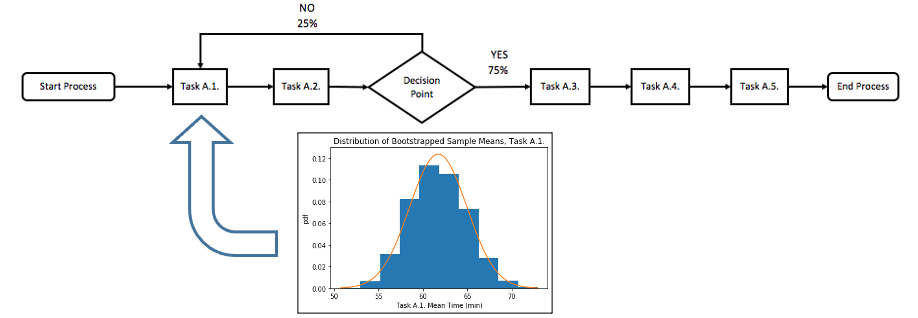

By representing the duration of tasks within a process in terms of distribution of time rather than a simple average, we can start of simulate the operations of a workcenter and provide a more authentic model.

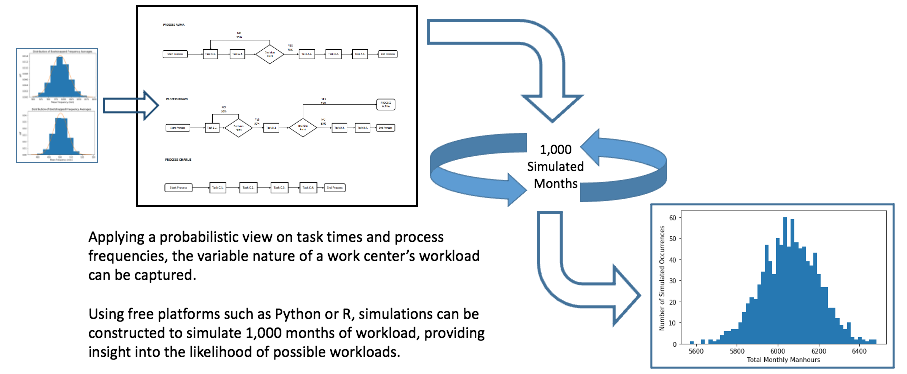

The following is an illustration of this possibility with a toy example, featuring the workcenter Corporate Co.  Corporate Co has three processes: 
- <b>Process Alpha:</b> Variable workload with one decision point and five tasks.  Process Alpha is only initiated when customers are redirected from Process Bravo.
- <b>Process Bravo:</b> Variable workload with two decision points and four tasks.
- <b>Process Charlie:</b> Variable workload with four tasks.

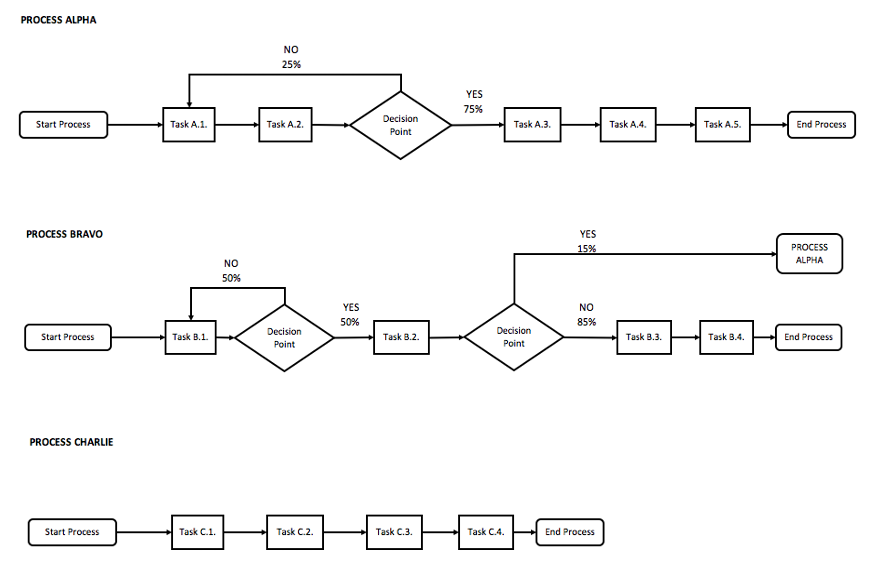

To start, we need to import the applicable Python packages.

In [2]:
# Import the python packages that will be used throughout this program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import random
from fitter import Fitter

In this demonstration, we will be bootstrapping process times.  As such, we will define the functions necessary for performing that action below.

In [3]:
# Define data analytics functions what will be used throughout this program

# The function bootstrap_replicate generates a 1-dimensional bootstrap replicate from a 1-dimensional array of data
# The function returns whatever operation is requested to be performed on the replicate, often np.mean
# The code from this function was picked up from DataCamp's "Statistical Thinking in Python (Part 2)" course
def bootstrap_replicate(data, func):
    replicate = np.random.choice(data, len(data))
    return func(replicate)

# The function draw_bs_reps takes a 1-dimensional array of data and generates 'size' number of replicates
# The function returns an array of data that is gathered from each bootstrap replicate, determined by...
# ...func (often np.mean)
# The code from this function was picked up from DataCamp's "Statistical Thinking in Python (Part 2)" course
def draw_bs_reps(data, func, size = 1):
    #Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    #Generate 'size' number of replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate(data, func)
    
    return bs_replicates

For this demonstration, we will generate fictious samples of process times and customer rates.  In the real world, this data would be collected through sign-in rosters or process measurements.

In [4]:
# Data Collection
# Generate the sample times to complete each task
# In the real-world, this information would be measured or gathered from the subject matter experts

# Seed the random number generator
np.random.seed(42)

sample_size = 10

# Task A.1.
a1 = np.round(np.random.normal(55, 15, sample_size), 2)

# Task A.2.
a2 = np.round(np.random.normal(33, 3, sample_size), 2)

# Task A.3.
a3 = np.round(np.random.normal(90, 15, sample_size), 2)

# Task A.4.
a4 = np.round(np.random.normal(125, 20, sample_size), 2)

# Task A.5.
a5 = np.round(np.random.normal(37, 3, sample_size), 2)

# Task B.1.
b1 = np.round(np.random.normal(25, 5, sample_size), 2)

# Task B.2.
b2 = np.round(np.random.normal(30, 7, sample_size), 2)

# Task B.3.
b3 = np.round(np.random.normal(150, 20, sample_size), 2)

# Task B.4.
b4 = np.round(np.random.normal(45, 10, sample_size), 2)

# Task C.1.
c1 = np.round(np.random.normal(22, 5, sample_size), 2)

# Task C.2.
c2 = np.round(np.random.normal(60, 10, sample_size), 2)

# Task C.3.
c3 = np.round(np.random.normal(30, 15, sample_size), 2)

# Task C.4.
c4 = np.round(np.random.normal(45, 10, sample_size), 2)

# Store all data samples in an array of lists to call upon later
task_list = [a1, a2, a3, a4, a5, b1, b2, b3, b4, c1, c2, c3, c4]

# Generate the frequency of occurrence for Process Bravo and Charlie
# In the real-world, this information would be historical data gathered by subject matter experts
freqB = np.round(np.random.normal(1000, 100, 12))

freqC = np.round(np.random.poisson(500, 12))

# Store all frequency data in an array of lists to call upon later
freq_list = [freqB, freqC]

One common method that is used for computing manpower associated with a process is the Operational Audit.  This is a deterministic approach that takes the average process time for each step and multiplies it by the average frequency of the process.

In [12]:
# First, we compute the MMH using the techniques for operational audits.
# The output from this will be a single value as this is a deterministic process.

# Generate arrays with the frequency of each task, within each process
task_freq_alpha = [1.25, 1.25, 1, 1, 1]
task_freq_bravo = [1.5, 1, 0.85, 0.85]
task_freq_charlie = [1, 1, 1, 1]

# Generate arrays of the mean task time for each task, within each process
task_mean_alpha = [np.mean(a1), np.mean(a2), np.mean(a3), np.mean(a4), np.mean(a5)]
task_mean_bravo = [np.mean(b1), np.mean(b2), np.mean(b3), np.mean(b4)]
task_mean_charlie = [np.mean(c1), np.mean(c2), np.mean(c3), np.mean(c4)]

# Multiply the frequencies and the mean times together, and sum the arrays
avg_prcs_time_alpha = np.sum(np.multiply(task_freq_alpha, task_mean_alpha))
print('The average process time for Process Alpha is ' + str(avg_prcs_time_alpha))
avg_prcs_time_bravo = np.sum(np.multiply(task_freq_bravo, task_mean_bravo))
print('The average process time for Process Bravo is ' + str(avg_prcs_time_bravo))
avg_prcs_time_charlie = np.sum(np.multiply(task_freq_charlie, task_mean_charlie))
print('The average process time for Process Charlie is ' + str(avg_prcs_time_charlie))

# Determine the average number of occurrences for Processes Alpha, Bravo, and Charlie in a given month
avg_occur_bravo = np.mean(freqB)
avg_occur_alpha = 0.15 * avg_occur_bravo
avg_occur_charlie = np.mean(freqC)

# Compute the expected monthly manhours by mutliplying the process time by occurrences, and summing
# Need to convert minutes to hours by dividing by 60
MMH_oa = (avg_prcs_time_alpha * avg_occur_alpha + avg_prcs_time_bravo * avg_occur_bravo + avg_prcs_time_charlie * avg_occur_charlie) / 60
print('The computed monthly manhours for the workcenter is ' + str(MMH_oa))

The average process time for Process Alpha is 357.15075
The average process time for Process Bravo is 234.6915
The average process time for Process Charlie is 158.529
The computed monthly manhours for the workcenter is 6070.166040312499


Instead of relying on the average, as shown in the Operational Audit approach, we can instead leverage the Central Limit Theorem by bootstrapping our data.  This will process a sample distribution of mean times, and that sample distribution will be normally distributed regardless of the distribution of the raw data (per the CLT).

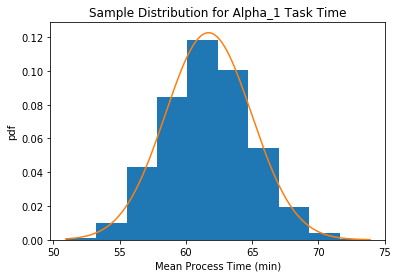

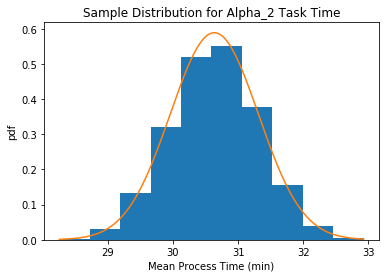

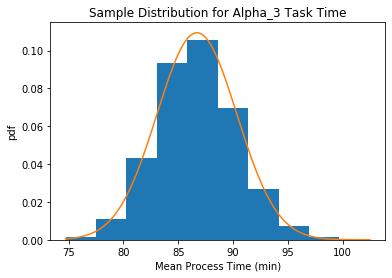

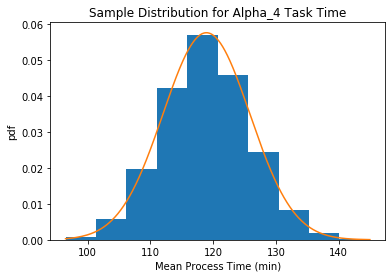

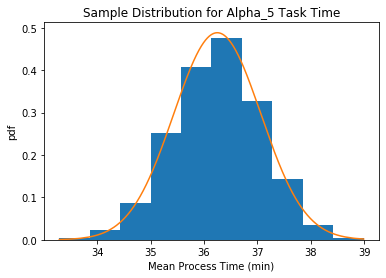

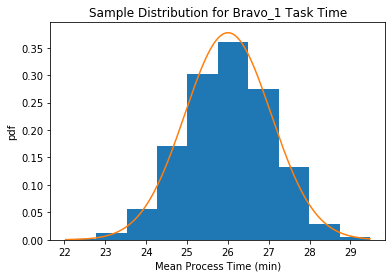

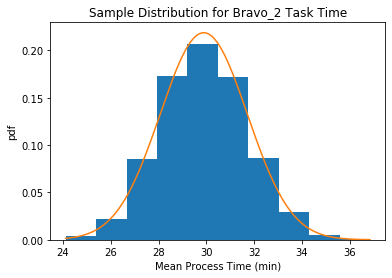

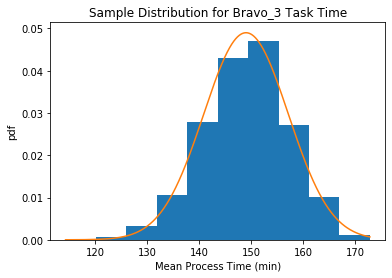

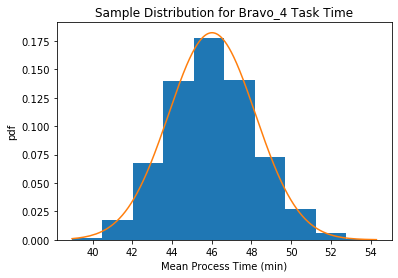

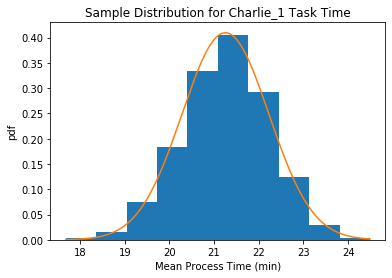

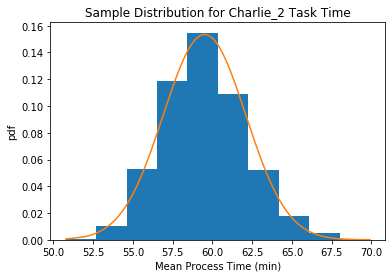

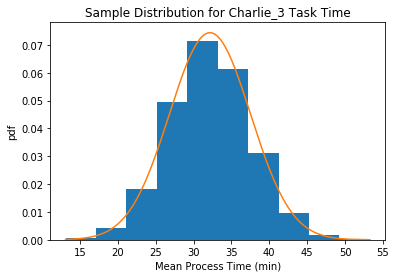

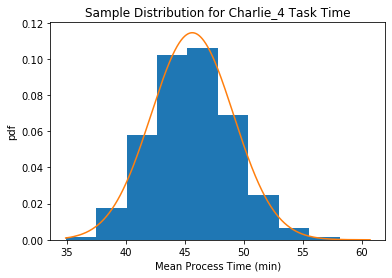

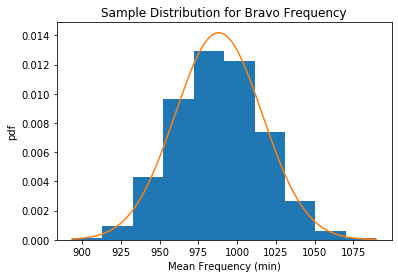

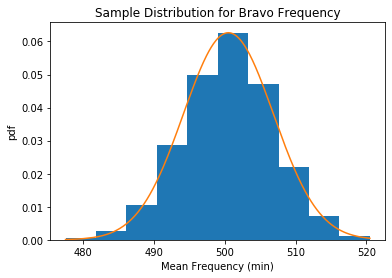

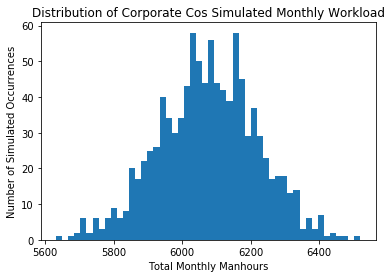

Mean: 6076.49
Standard Deviation: 143.29
75th Percentile: 6171.85
Max: 6521.11


In [8]:
# The next section of code is based on approximating the distribution of sample means using bootstrapping.
# We would anticipate that these results from this simulation would provide more variability that the operational...
# ...audit method, but less variability than the actual workcenter's variability in workload.  This is because....
# ...we are approximately the distribution of the average task time, and not the distribution of the task time itself.

# Bootstrap the sample task times and frequency data for each task under review

# Initialize bootstrap replicate list
bs_mean = []
bs_std = []
task_titles = ['Alpha_1', 'Alpha_2', 'Alpha_3', 'Alpha_4', 'Alpha_5', 'Bravo_1', 'Bravo_2', 'Bravo_3', 'Bravo_4', 'Charlie_1', 'Charlie_2', 'Charlie_3', 'Charlie_4']
i = 0
# Given each array of sample data, 10,000 bootstrapped replicates are generated and averaged
# The array of averages, which is normally distributed, is temporarily assigned to variable 'rep_data'
# The mean and standard deviation for each replicate, which are the parameters of the corresponding normal...
# ...distribution, are stored in the arrays 'bs_mean' and 'bs_std', respectively.
# The lines of code that would generate a histogram are commented out to cut processing time
# The commented out code will also fit a normal distribution to the histogram and superimpose the figures
# See 'Central Limit Theorem' for rationale as to why we know it will be normally distributed
for task in task_list:
    rep_data = draw_bs_reps(task, np.mean, 10000)
    rep_data.sort()
    plt.hist(rep_data, density = True)
    fit = stats.norm.pdf(rep_data, np.mean(rep_data), np.std(rep_data))
    plt.plot(rep_data, fit, '-')
    plt.xlabel('Mean Process Time (min)')
    plt.ylabel('pdf')
    plt.title(f'Sample Distribution for {task_titles[i]} Task Time')
    plt.show()
    i += 1
    bs_mean.append(np.mean(rep_data))
    bs_std.append(np.std(rep_data))

    
# Initialize bootstrap replicate lists
bs_mean_freq = []
bs_std_freq = []
process_titles = ['Bravo', 'Charlie']
i = 0

# See notes above; same actions except using the historical frequency data
for freq in freq_list:   
    rep_data = draw_bs_reps(freq, np.mean, 10000)
    rep_data.sort()
    plt.hist(rep_data, density = True)
    fit = stats.norm.pdf(rep_data, np.mean(rep_data), np.std(rep_data))
    plt.plot(rep_data, fit, '-')
    plt.xlabel('Mean Frequency (min)')
    plt.ylabel('pdf')
    plt.title(f'Sample Distribution for {process_titles[i]} Frequency')
    plt.show()
    bs_mean_freq.append(np.mean(rep_data))
    bs_std_freq.append(np.std(rep_data))

    
#####################################################################
#####################################################################
# Define functions to represent the processes being measured
# All times are measured in minutes
# The time associated with the tasks are drawn from distributions

def process_alpha(log):
    # Initialize the process timer: prcs_A_clock
    prcs_A_clock = 0
    
    # Task A.1.
    prcs_A_clock += np.random.normal(bs_mean[0], bs_std[0])
    
    # Task A.2. 
    prcs_A_clock += np.random.normal(bs_mean[1], bs_std[1])
    
    # Decision Point
    # 25% of the time, the process returns to Task A.1.
    # Draw a random number between 0 and 1
    # If random number is less that 0.25 (or 25%), then repeat Tasks A.1. and A.2.
    dp = np.random.uniform(0, 1)
    if dp <= 0.25:
        # Task A.1.
        prcs_A_clock += np.random.normal(bs_mean[0], bs_std[0])

        # Task A.2. 
        prcs_A_clock += np.random.normal(bs_mean[1], bs_std[1])    
    
    # Task A.3.
    prcs_A_clock += np.random.normal(bs_mean[2], bs_std[2])
    
    # Task A.4.
    prcs_A_clock += np.random.normal(bs_mean[3], bs_std[3])
    
    # Task A.5.
    prcs_A_clock += np.random.normal(bs_mean[4], bs_std[4])
    
    # End process
    # Store the process time in the prcs_A_log
    log.append(prcs_A_clock)
    
def process_bravo(log_B, log_A):
    # Initialize the process timer: prcs_B_clock
    prcs_B_clock = 0
    
    # Task B.1.
    prcs_B_clock += np.random.normal(bs_mean[5], bs_std[5])

    # Decision Point
    # 50% of the time, the process returns to Task B.1.
    # Draw a random number between 0 and 1
    # If random number is less that 0.5 (or 50%), then repeat Tasks B.1.
    dp = np.random.uniform(0, 1)
    if dp <= 0.50:
        # Task B.1.
        prcs_B_clock += np.random.normal(bs_mean[5], bs_std[5])

    # Task B.2. 
    prcs_B_clock += np.random.normal(bs_mean[6], bs_std[6])
    
    # Decision Point
    # 15% of the time, the process terminates and initiates Process ALPHA
    # 85% of the time, the process continues
    # Draw a random number between 0 and 1
    # If random number is less that 0.15 (or 15%), then terminate the process and initiate Process ALPHA
    # Else, continue the process
    dp = np.random.uniform(0, 1)
    if dp <= 0.15:
        # End process
        # Store the process time in the prcs_B_log
        log_B.append(prcs_B_clock)

        # Initiate Process ALPHA
        process_alpha(log_A)    
    
    else :
        # Continue the process
        # Task B.3. 
        prcs_B_clock += np.random.normal(bs_mean[7], bs_std[7])

        # Task B.4. 
        prcs_B_clock += np.random.normal(bs_mean[8], bs_std[8])

        # End process
        # Store the process time in the prcs_B_log
        log_B.append(prcs_B_clock)
        
def process_charlie(log):
    # Initialize the process timer: prcs_C_clock
    prcs_C_clock = 0
    
    # Task C.1.
    prcs_C_clock += np.random.normal(bs_mean[9], bs_std[9])
    
    # Task C.2. 
    prcs_C_clock += np.random.normal(bs_mean[10], bs_std[10])
    
    # Task C.3.
    prcs_C_clock += np.random.normal(bs_mean[11], bs_std[11])
    
    # Task C.4.
    prcs_C_clock += np.random.normal(bs_mean[12], bs_std[12])
    
    # End process
    # Store the process time in the prcs_C_log
    log.append(prcs_C_clock)
    
#####################################################################
#####################################################################
# Run a Monte Carlo simulation to represent 1,000 months of workcenter operations
# In this example, let's assume:
# --Process Alpha doesn't occur unless Process Bravo initiates it
# --Process Bravo occurs at a monthly frequency of N(np.mean(bs_freqB), np.std(bs_freqB))
# --Process Charlie occurs at a monthly frequncy of N(np.mean(bs_freqC), np.std(bs_freqC))

# Set the number of simulated months
simulated_months = 1000

# Initial log of total simulated monthly manhours
bs_total_MMH_log = []

for i in range(simulated_months):
    # Initialize process logs at the start of each simulated month
    prcs_A_log = []
    prcs_B_log = []
    prcs_C_log = []
    
    # Simulate the monthly frequency of Process Bravo
    # Need to round the outcome as the range() must be an integer
    for freq_B in range(np.round(np.random.normal(bs_mean_freq[0], bs_std_freq[0])).astype(int)):
        process_bravo(prcs_B_log, prcs_A_log)
    
    # Simulate the monthly frequency of Process Charlie
    # Need to round the outcome as the range() must be an integer
    for freq_C in range(np.round(np.random.normal(bs_mean_freq[1], bs_std_freq[1])).astype(int)):
        process_charlie(prcs_C_log)
    
    # At the end of each simulated month, append the Total Monthly Manhour Log
    bs_total_MMH_log.append(np.sum(prcs_A_log) + np.sum(prcs_B_log) + np.sum(prcs_C_log))      
    
# Convert the data in total_MMH_log from minutes to hours
bs_total_MMH_log = np.divide(bs_total_MMH_log, 60)

# Plot histogram of the results
plt.hist(bs_total_MMH_log, bins = 50)
plt.xlabel('Total Monthly Manhours')
plt.ylabel('Number of Simulated Occurrences')
plt.title('Distribution of Corporate Cos Simulated Monthly Workload')
plt.show()
print('Mean: ' + str(np.round(np.mean(bs_total_MMH_log), 2)))
print('Standard Deviation: ' + str(np.round(np.std(bs_total_MMH_log), 2)))
print('75th Percentile: ' + str(np.round(np.percentile(bs_total_MMH_log, 75), 2)))
print('Max: ' + str(np.round(np.max(bs_total_MMH_log), 2)))

Depending on the available data, we could also attempt to fit a distribution to the process time itself rather than bootstrapping the sample distribution.  This approach would be advantageous because it would yield more representative outputs as it would be more adept at factoring in outlier scenarios that Corporate Co might experience.  Bootstrapping, conversely, minimizes the magnitude of outlier events by iteratively taking many sample means to generate the sample distribution.

Fitted norm distribution with error=1.1866130608989214)
Fitted norm distribution with error=20.549946571994283)
Fitted norm distribution with error=0.47205085574409744)
Fitted norm distribution with error=0.1898746870302259)
Fitted norm distribution with error=12.708051469094313)
Fitted norm distribution with error=12.925985393720707)
Fitted norm distribution with error=2.8886758164879915)
Fitted norm distribution with error=0.1861601037571527)
Fitted norm distribution with error=2.12877185785589)
Fitted norm distribution with error=5.952313739545984)
Fitted norm distribution with error=0.7983038648257984)
Fitted norm distribution with error=0.20421008347456843)
Fitted norm distribution with error=0.7074728875800015)
Fitted norm distribution with error=0.007834506948876264)
Fitted norm distribution with error=0.1571234183491576)


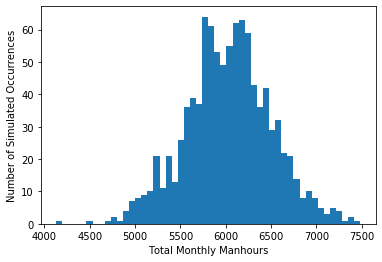

Mean: 6031.48
Standard Deviation: 473.5
75th Percentile: 6328.52
Max: 7484.29


In [9]:
# The next section of the code is finding the probability distribution of the task times, rather than bootstrapping...
# ...to find the distribution of the sample mean.
# We expect that the distributions will have greater fidelity and accuracy as more samples are measured.
# Similarly, we would expect the variation from the final simulation using this method to be greater than the...
# ...variation from the bootstrapped approach above.

# Fit a distribution to the data
# For this toy example, I am making the assumption that I suspect the distributions to be normal for ease of code
# Normally, multiple distributions would be considered given the data measured and the context of the data
# I did use the Fitter module, which can easily be configured to consider more than just the normal dist.

mu_list = []
sigma_list = []

for task in task_list:
    f = Fitter(task, distributions = ['norm'])
    f.fit()
#    f.summary()
    mu_list.append(f.get_best()['norm'][0])
    sigma_list.append(f.get_best()['norm'][1])
#    plt.show()

# Similarly, fit a distribution to the frequency data received
# For this toy example, I am making the assumption that I suspect the distributions for ease of code
# Normally, multiple distributions would be considered given the data measured and the context of the data
# I did use the Fitter module, which can easily be configured to consider more than just the normal dist.
# It doesn't appear that Fitter has Poisson distribution at this time.

mu_freq_list = []
sigma_freq_list = []

for freq in freq_list:
    f = Fitter(freq, distributions = ['norm'])
    f.fit()
#    f.summary()
    mu_freq_list.append(f.get_best()['norm'][0])
    sigma_freq_list.append(f.get_best()['norm'][1])
#    plt.show()
    
#####################################################################
#####################################################################
# Define functions to represent the processes being measured
# All times are measured in minutes
# The time associated with the tasks would be drawn from a distribution
# Ideally the distribution would be fit to the measured samples
# If an empirical distubution is not available, a normal distribution of the sample means can be generated...
# ...via bootstrapping

def process_alpha(log):
    # Initialize the process timer: prcs_A_clock
    prcs_A_clock = 0
    
    # Task A.1.
    prcs_A_clock += np.random.normal(mu_list[0], sigma_list[0])
    
    # Task A.2. 
    prcs_A_clock += np.random.normal(mu_list[1], sigma_list[1])
    
    # Decision Point
    # 25% of the time, the process returns to Task A.1.
    # Draw a random number between 0 and 1
    # If random number is less that 0.25 (or 25%), then repeat Tasks A.1. and A.2.
    dp = np.random.uniform(0, 1)
    if dp <= 0.25:
        # Task A.1.
        prcs_A_clock += np.random.normal(mu_list[0], sigma_list[0])

        # Task A.2. 
        prcs_A_clock += np.random.normal(mu_list[1], sigma_list[1])    
    
    # Task A.3.
    prcs_A_clock += np.random.normal(mu_list[2], sigma_list[2])
    
    # Task A.4.
    prcs_A_clock += np.random.normal(mu_list[3], sigma_list[3])
    
    # Task A.5.
    prcs_A_clock += np.random.normal(mu_list[4], sigma_list[4])
    
    # End process
    # Store the process time in the prcs_A_log
    log.append(prcs_A_clock)
    
def process_bravo(log_B, log_A):
    # Initialize the process timer: prcs_B_clock
    prcs_B_clock = 0
    
    # Task B.1.
    prcs_B_clock += np.random.normal(mu_list[5], sigma_list[5])

    # Decision Point
    # 50% of the time, the process returns to Task B.1.
    # Draw a random number between 0 and 1
    # If random number is less that 0.5 (or 50%), then repeat Tasks B.1.
    dp = np.random.uniform(0, 1)
    if dp <= 0.50:
        # Task B.1.
        prcs_B_clock += np.random.normal(mu_list[5], sigma_list[5])

    # Task B.2. 
    prcs_B_clock += np.random.normal(mu_list[6], sigma_list[6])
    
    # Decision Point
    # 15% of the time, the process terminates and initiates Process ALPHA
    # 85% of the time, the process continues
    # Draw a random number between 0 and 1
    # If random number is less that 0.15 (or 15%), then terminate the process and initiate Process ALPHA
    # Else, continue the process
    dp = np.random.uniform(0, 1)
    if dp <= 0.15:
        # End process
        # Store the process time in the prcs_B_log
        log_B.append(prcs_B_clock)

        # Initiate Process ALPHA
        process_alpha(log_A)    
    
    else :
        # Continue the process
        # Task B.3. 
        prcs_B_clock += np.random.normal(mu_list[7], sigma_list[7])

        # Task B.4. 
        prcs_B_clock += np.random.normal(mu_list[8], sigma_list[8])

        # End process
        # Store the process time in the prcs_B_log
        log_B.append(prcs_B_clock)
        
def process_charlie(log):
    # Initialize the process timer: prcs_C_clock
    prcs_C_clock = 0
    
    # Task C.1.
    prcs_C_clock += np.random.normal(mu_list[9], sigma_list[9])
    
    # Task C.2. 
    prcs_C_clock += np.random.normal(mu_list[10], sigma_list[10])
    
    # Task C.3.
    prcs_C_clock += np.random.normal(mu_list[11], sigma_list[11])
    
    # Task C.4.
    prcs_C_clock += np.random.normal(mu_list[12], sigma_list[12])
    
    # End process
    # Store the process time in the prcs_C_log
    log.append(prcs_C_clock)
#####################################################################
#####################################################################

# Run a Monte Carlo simulation to represent 1,000 months of workcenter operations
# In this example, let's assume:
# --Process Alpha doesn't occur unless Process Bravo initiates it
# --Process Bravo occurs at a monthly frequency of N(np.mean(bs_freqB), np.std(bs_freqB))
# --Process Charlie occurs at a monthly frequncy of N(np.mean(bs_freqC), np.std(bs_freqC))

# Set the number of simulated months
simulated_months = 1000

# Initial log of total simulated monthly manhours
total_MMH_log = []

for i in range(simulated_months):
    # Initialize process logs at the start of each simulated month
    prcs_A_log = []
    prcs_B_log = []
    prcs_C_log = []
    
    # Simulate the monthly frequency of Process Bravo
    # Need to round the outcome as the range() must be an integer
    for freq_B in range(np.round(np.random.normal(mu_freq_list[0], sigma_freq_list[0])).astype(int)):
        process_bravo(prcs_B_log, prcs_A_log)
    
    # Simulate the monthly frequency of Process Charlie
    # Need to round the outcome as the range() must be an integer
    for freq_C in range(np.round(np.random.normal(mu_freq_list[1], sigma_freq_list[1])).astype(int)):
        process_charlie(prcs_C_log)
    
    # At the end of each simulated month, append the Total Monthly Manhour Log
    total_MMH_log.append(np.sum(prcs_A_log) + np.sum(prcs_B_log) + np.sum(prcs_C_log))      
    
# Convert the data in total_MMH_log from minutes to hours
total_MMH_log = np.divide(total_MMH_log, 60)

# Plot histogram of the results
plt.hist(total_MMH_log, bins = 50)
plt.xlabel('Total Monthly Manhours')
plt.ylabel('Number of Simulated Occurrences')
plt.show()
print('Mean: ' + str(np.round(np.mean(total_MMH_log), 2)))
print('Standard Deviation: ' + str(np.round(np.std(total_MMH_log), 2)))
print('75th Percentile: ' + str(np.round(np.percentile(total_MMH_log, 75), 2)))
print('Max: ' + str(np.round(np.max(total_MMH_log), 2)))

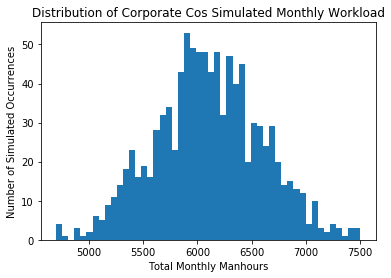

Mean: 6103.66
Standard Deviation: 493.03


In [10]:
# The following section of the code is to compute the "true" workload of the office
# As data sample data was generated using probability distributions that were then approximated, the following...
# ...displays the simulation of workload based on the correct distributions.

#####################################################################
#####################################################################
# Define functions to represent the processes being measured
# All times are measured in minutes
# The time associated with the tasks would be drawn from a distribution
# Ideally the distribution would be fit to the measured samples
# If an empirical distubution is not available, a normal distribution of the sample means can be generated...
# ...via bootstrapping

def process_alpha(log):
    # Initialize the process timer: prcs_A_clock
    prcs_A_clock = 0
    
    # Task A.1.
    prcs_A_clock += np.random.normal(55, 15)
    
    # Task A.2. 
    prcs_A_clock += np.random.normal(33, 3)
    
    # Decision Point
    # 25% of the time, the process returns to Task A.1.
    # Draw a random number between 0 and 1
    # If random number is less that 0.25 (or 25%), then repeat Tasks A.1. and A.2.
    dp = np.random.uniform(0, 1)
    if dp <= 0.25:
        # Task A.1.
        prcs_A_clock += np.random.normal(55, 15)

        # Task A.2. 
        prcs_A_clock += np.random.normal(33, 3)       
    
    # Task A.3.
    prcs_A_clock += np.random.normal(90, 15)
    
    # Task A.4.
    prcs_A_clock += np.random.normal(125, 20)
    
    # Task A.5.
    prcs_A_clock += np.random.normal(37, 3)
    
    # End process
    # Store the process time in the prcs_A_log
    log.append(prcs_A_clock)
    
def process_bravo(log_B, log_A):
    # Initialize the process timer: prcs_B_clock
    prcs_B_clock = 0
    
    # Task B.1.
    prcs_B_clock += np.random.normal(25, 5)

    # Decision Point
    # 50% of the time, the process returns to Task B.1.
    # Draw a random number between 0 and 1
    # If random number is less that 0.5 (or 50%), then repeat Tasks B.1.
    dp = np.random.uniform(0, 1)
    if dp <= 0.50:
        # Task B.1.
        prcs_B_clock += np.random.normal(25, 5)

    # Task B.2. 
    prcs_B_clock += np.random.normal(30, 7)
    
    # Decision Point
    # 15% of the time, the process terminates and initiates Process ALPHA
    # 85% of the time, the process continues
    # Draw a random number between 0 and 1
    # If random number is less that 0.15 (or 15%), then terminate the process and initiate Process ALPHA
    # Else, continue the process
    dp = np.random.uniform(0, 1)
    if dp <= 0.15:
        # End process
        # Store the process time in the prcs_B_log
        log_B.append(prcs_B_clock)

        # Initiate Process ALPHA
        process_alpha(log_A)    
    
    else :
        # Continue the process
        # Task B.3. 
        prcs_B_clock += np.random.normal(150, 20)

        # Task B.4. 
        prcs_B_clock += np.random.normal(45, 10)

        # End process
        # Store the process time in the prcs_B_log
        log_B.append(prcs_B_clock)
        
def process_charlie(log):
    # Initialize the process timer: prcs_C_clock
    prcs_C_clock = 0
    
    # Task C.1.
    prcs_C_clock += np.random.normal(22, 5)
    
    # Task C.2. 
    prcs_C_clock += np.random.normal(60, 10)
    
    # Task C.3.
    prcs_C_clock += np.random.normal(30, 15)
    
    # Task C.4.
    prcs_C_clock += np.random.normal(45, 10)
    
    # End process
    # Store the process time in the prcs_C_log
    log.append(prcs_C_clock)
#####################################################################
#####################################################################
# Run a Monte Carlo simulation to represent 1,000 months of workcenter operations
# In this example, let's assume:
# --Process Alpha doesn't occur unless Process Bravo initiates it
# --Process Bravo occurs at a monthly frequency of N(np.mean(bs_freqB), np.std(bs_freqB))
# --Process Charlie occurs at a monthly frequncy of N(np.mean(bs_freqC), np.std(bs_freqC))

# Set the number of simulated months
simulated_months = 1000

# Initial log of total simulated monthly manhours
true_total_MMH_log = []

for i in range(simulated_months):
    # Initialize process logs at the start of each simulated month
    prcs_A_log = []
    prcs_B_log = []
    prcs_C_log = []
    
    # Simulate the monthly frequency of Process Bravo
    # Need to round the outcome as the range() must be an integer
    for freq_B in range(np.round(np.random.normal(1000, 100)).astype(int)):
        process_bravo(prcs_B_log, prcs_A_log)
    
    # Simulate the monthly frequency of Process Charlie
    # Need to round the outcome as the range() must be an integer
    for freq_C in range(np.random.poisson(500)):
        process_charlie(prcs_C_log)
    
    # At the end of each simulated month, append the Total Monthly Manhour Log
    true_total_MMH_log.append(np.sum(prcs_A_log) + np.sum(prcs_B_log) + np.sum(prcs_C_log))      
    
# Convert the data in total_MMH_log from minutes to hours
true_total_MMH_log = np.divide(true_total_MMH_log, 60)

# Plot histogram of the results
plt.hist(true_total_MMH_log, bins = 50)
plt.xlabel('Total Monthly Manhours')
plt.ylabel('Number of Simulated Occurrences')
plt.title('Distribution of Corporate Cos Simulated Monthly Workload')
plt.show()
print('Mean: ' + str(np.round(np.mean(true_total_MMH_log), 2)))
print('Standard Deviation: ' + str(np.round(np.std(true_total_MMH_log), 2)))

We can now compare these three approaches to observe how effectively each of them simulate the spread of likely months of workload.

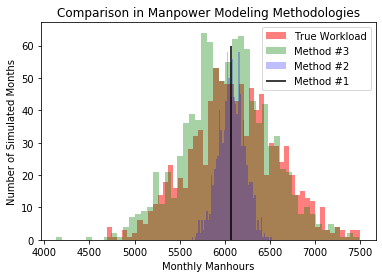

6070.166040312499
6225.62
6516.38
Including overload factor, the recommended manning using Operational Audit is 38.0
Not including overload factor, the recommended manning using Operational Audit is 41.0
Including overload factor, the recommended manning using Simulation w/Bootstrap is 39.0
Not including overload factor, the recommended manning using Simulation w/Bootstrap is 42.0
Including overload factor, the recommended manning using Simulation is 41.0
Not including overload factor, the recommended manning using Simulation is 44.0


In [13]:
#Compare the results from all methodologies with the "true" workload distribution 
plt.hist(true_total_MMH_log, bins = 50, alpha = 0.5, color = 'red', label = 'True Workload') 
plt.hist(total_MMH_log, bins = 50, alpha = 0.35, color = 'green', label = 'Method #3') 
plt.hist(bs_total_MMH_log, bins = 50, alpha = 0.25, color = 'blue', label = 'Method #2') 
plt.vlines(MMH_oa, 0, 60, color = 'black', label = 'Method #1') 
plt.legend() 
plt.xlabel('Monthly Manhours') 
plt.ylabel('Number of Simulated Months') 
plt.title('Comparison in Manpower Modeling Methodologies') 
plt.show()

oa_recommended = MMH_oa 
bs_recommended = np.round(np.percentile(bs_total_MMH_log, 85), 2) 
sim_recommended = np.round(np.percentile(total_MMH_log, 85), 2)

print(oa_recommended) 
print(bs_recommended) 
print(sim_recommended)

MAF = 149.6 
OLF = 1.077 

manning_oa_olf = np.ceil(oa_recommended/(MAF*OLF)) 
manning_oa_no_olf = np.ceil(oa_recommended/MAF)
manning_bs_olf = np.ceil(bs_recommended/(MAF*OLF)) 
manning_bs_no_olf = np.ceil(bs_recommended/MAF)
manning_sim_olf = np.ceil(sim_recommended/(MAF*OLF)) 
manning_sim_no_olf = np.ceil(sim_recommended/MAF)

print(f'Including overload factor, the recommended manning using Operational Audit is {manning_oa_olf}') 
print(f'Not including overload factor, the recommended manning using Operational Audit is {manning_oa_no_olf}')
print(f'Including overload factor, the recommended manning using Simulation w/Bootstrap is {manning_bs_olf}') 
print(f'Not including overload factor, the recommended manning using Simulation w/Bootstrap is {manning_bs_no_olf}')
print(f'Including overload factor, the recommended manning using Simulation is {manning_sim_olf}') 
print(f'Not including overload factor, the recommended manning using Simulation is {manning_sim_no_olf}')

To understand the impact of poor workforce planning, we can run a simulation to see how the recommended levels of each approach fair with handling a simulated workload.  Particularly, we are interested in seeing how much work requires overtime or is leftover for the next day and how often the office is overmanned.

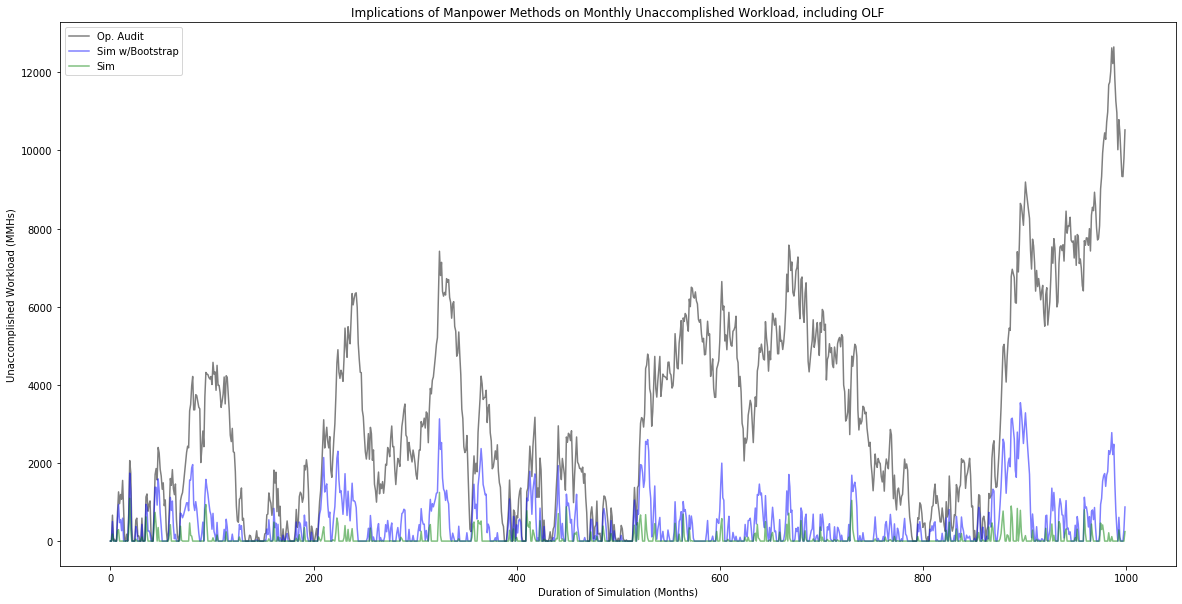

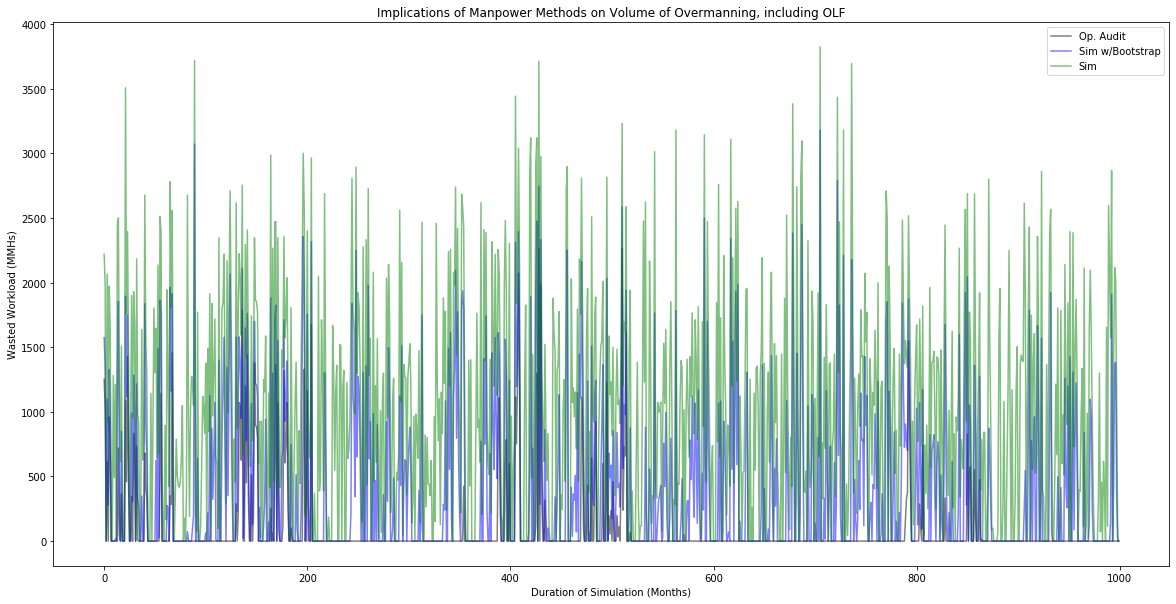

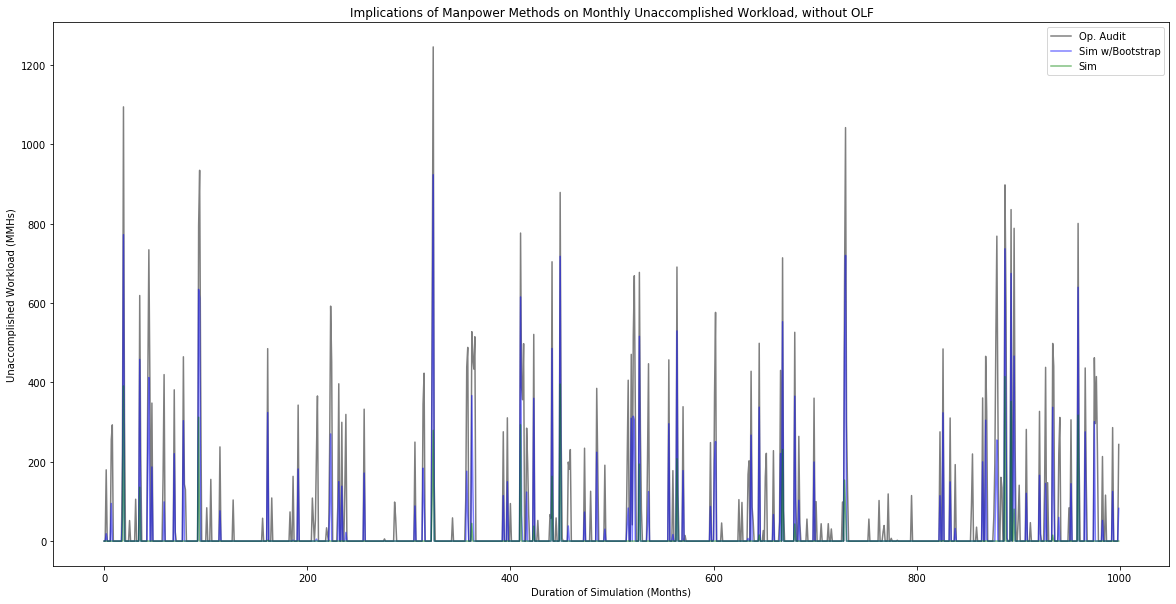

In [14]:
# What is the impact of poor workload planning?
overwork_log_oa = []
overwork_log_bs = []
overwork_log_sim = []

waste_log_oa = []
waste_log_bs = []
waste_log_sim = []

leftover_oa = 0
leftover_bs = 0
leftover_sim = 0

waste_oa = 0
waste_bs = 0
waste_sim = 0

oa_recommended = manning_oa_olf * MAF * OLF
bs_recommended = manning_bs_olf * MAF * OLF
sim_recommended = manning_sim_olf * MAF * OLF

for month in true_total_MMH_log:
    leftover_oa = (month + leftover_oa) - oa_recommended
    waste_oa = oa_recommended - (month + leftover_oa)
    if leftover_oa < 0:
        leftover_oa = 0
    if waste_oa < 0:
        waste_oa = 0
    overwork_log_oa.append(leftover_oa)
    waste_log_oa.append(waste_oa)
    
    leftover_bs = (month + leftover_bs) - bs_recommended
    waste_bs = bs_recommended - (month + leftover_bs)
    if leftover_bs < 0:
        leftover_bs = 0
    if waste_bs < 0:
        waste_bs = 0
    overwork_log_bs.append(leftover_bs)
    waste_log_bs.append(waste_bs)
    
    leftover_sim = (month + leftover_sim) - sim_recommended
    waste_sim = sim_recommended - (month + leftover_sim)
    if leftover_sim < 0:
        leftover_sim = 0
    if waste_sim < 0:
        waste_sim = 0
    overwork_log_sim.append(leftover_sim)
    waste_log_sim.append(waste_sim)

plt.figure(figsize = (20, 10))    
plt.plot(overwork_log_oa, color = 'black', alpha = 0.5, label = 'Op. Audit')
plt.plot(overwork_log_bs, color = 'blue', alpha = 0.5, label = 'Sim w/Bootstrap')
plt.plot(overwork_log_sim, color = 'green', alpha = 0.5, label = 'Sim')
plt.ylabel('Unaccomplished Workload (MMHs)')
plt.xlabel('Duration of Simulation (Months)')
plt.title('Implications of Manpower Methods on Monthly Unaccomplished Workload, including OLF')
plt.legend()
plt.show()

plt.figure(figsize = (20, 10))   
plt.plot(waste_log_oa, color = 'black', alpha = 0.5, label = 'Op. Audit')
plt.plot(waste_log_bs, color = 'blue', alpha = 0.5, label = 'Sim w/Bootstrap')
plt.plot(waste_log_sim, color = 'green', alpha = 0.5, label = 'Sim')
plt.ylabel('Wasted Workload (MMHs)')
plt.xlabel('Duration of Simulation (Months)')
plt.title('Implications of Manpower Methods on Volume of Overmanning, including OLF')
plt.legend()
plt.show()
###################################################################

overwork_log_oa = []
overwork_log_bs = []
overwork_log_sim = []

leftover_oa = 0
leftover_bs = 0
leftover_sim = 0

oa_recommended = manning_oa_no_olf * MAF * OLF
bs_recommended = manning_bs_no_olf * MAF * OLF
sim_recommended = manning_sim_no_olf * MAF * OLF

for month in true_total_MMH_log:
    leftover_oa = (month + leftover_oa) - oa_recommended
    if leftover_oa < 0:
        leftover_oa = 0
    overwork_log_oa.append(leftover_oa)
    
    leftover_bs = (month + leftover_bs) - bs_recommended
    if leftover_bs < 0:
        leftover_bs = 0
    overwork_log_bs.append(leftover_bs)
    
    leftover_sim = (month + leftover_sim) - sim_recommended
    if leftover_sim < 0:
        leftover_sim = 0
    overwork_log_sim.append(leftover_sim)

plt.figure(figsize = (20, 10))   
plt.plot(overwork_log_oa, color = 'black', alpha = 0.5, label = 'Op. Audit')
plt.plot(overwork_log_bs, color = 'blue', alpha = 0.5, label = 'Sim w/Bootstrap')
plt.plot(overwork_log_sim, color = 'green', alpha = 0.5, label = 'Sim')
plt.ylabel('Unaccomplished Workload (MMHs)')
plt.xlabel('Duration of Simulation (Months)')
plt.title('Implications of Manpower Methods on Monthly Unaccomplished Workload, without OLF')
plt.legend()
plt.show()